In [143]:
import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

In [166]:
path = "TLB_logs/"
file = "tlb_all_ucr_16_4-28-02-24.csv"
# file = "tlb_all_ucr_16_256-14-10-24.csv"
# file = "tlb_all_ucr_8_8-28-02-24.csv"

df = pd.read_csv(path + file)

mapping = {"sfa_equi-depth_False": "SFA Equi-Depth",
           "sfa_equi-depth_True": "SFA Equi-Depth +Variance",
           "sfa_equi-width_False": "SFA Equi-Width",
           "sfa_equi-width_True": "SFA Equi-Width +Variance",
           "isax": "iSAX",
           }

for key in mapping:
    df.Method = df.Method.replace({key: mapping[key]})
    
df

,Method,Dataset,TLB
0,iSAX,ArrowHead,0.006487
1,iSAX,ArrowHead,0.024127
2,iSAX,ArrowHead,0.037671
3,iSAX,ArrowHead,0.045388
4,iSAX,ArrowHead,0.059547
...,...,...,...
190475,SFA Equi-Depth,Yoga,0.641369
190476,SFA Equi-Depth,Yoga,0.643409
190477,SFA Equi-Depth,Yoga,0.645810
190478,SFA Equi-Depth,Yoga,0.648207


In [167]:
df[df.TLB>1]

,Method,Dataset,TLB


In [177]:
df[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False)

,TLB
Method,
SFA Equi-Depth +Variance,0.216597
SFA Equi-Depth,0.210111
SFA Equi-Width +Variance,0.196582
SFA Equi-Width,0.189841
iSAX,0.158974


In [178]:
print(df[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False).to_markdown())

| Method                   |      TLB |
|:-------------------------|---------:|
| SFA Equi-Depth +Variance | 0.216597 |
| SFA Equi-Depth           | 0.210111 |
| SFA Equi-Width +Variance | 0.196582 |
| SFA Equi-Width           | 0.189841 |
| iSAX                     | 0.158974 |


In [170]:
df[["Method", "TLB"]].groupby("Method").max().sort_values(by="TLB", ascending=False)

,TLB
Method,
SFA Equi-Depth +Variance,0.718878
SFA Equi-Depth,0.718527
iSAX,0.677946
SFA Equi-Width +Variance,0.676364
SFA Equi-Width,0.669033


In [89]:
df[df["TLB"]>1] # ["Method", "TLB]

,Method,Dataset,TLB


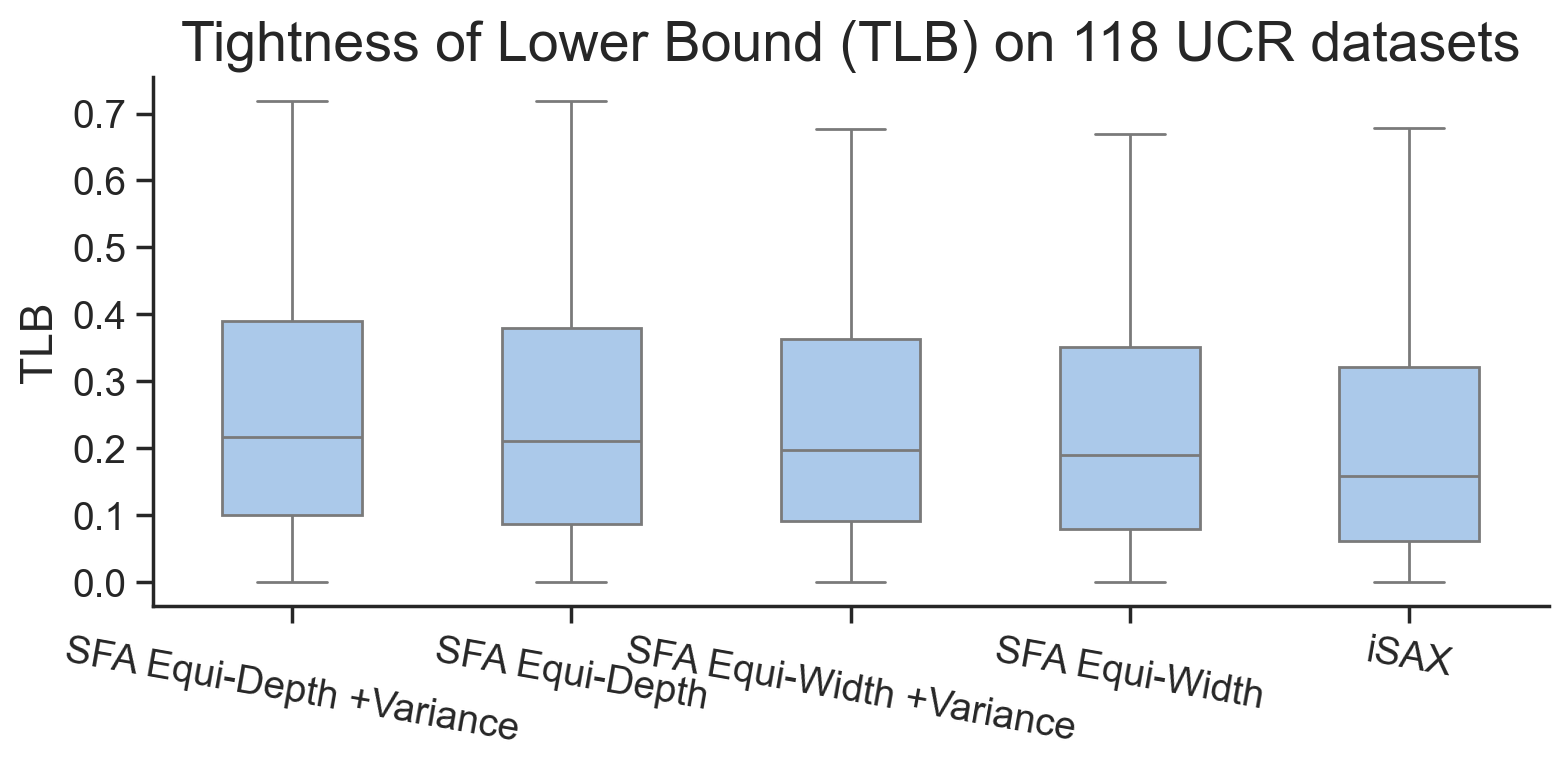

In [90]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(
    x="Method", y="TLB", data=df, width=.5,
    order=df[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False).reset_index()["Method"], ax=ax)
ax.set_title("Tightness of Lower Bound (TLB) on 118 UCR datasets", fontsize=20)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10, fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel("TLB", fontsize=16)
ax.set_xlabel("")
sns.despine()
# plt.show()
plt.tight_layout()
plt.savefig("images/tlb_boxplot.pdf", bbox_inches='tight')

In [91]:
df_pivot = df.pivot_table(index="Dataset", columns=["Method"], values=["TLB"])
df_pivot.reset_index(drop=True)
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot = df_pivot.round(4)
display(df_pivot)
# df_pivot.describe()

Method,SFA Equi-Depth,SFA Equi-Depth +Variance,SFA Equi-Width,SFA Equi-Width +Variance,iSAX
Dataset,,,,,
ArrowHead,0.2792,0.2880,0.2873,0.2947,0.2368
BME,0.3592,0.3593,0.3344,0.3332,0.3455
Beef,0.1274,0.1317,0.1521,0.1572,0.1082
BeetleFly,0.3201,0.3202,0.3223,0.3253,0.3071
BirdChicken,0.3278,0.3278,0.3438,0.3439,0.3136
...,...,...,...,...,...
Wine,0.2553,0.2554,0.2077,0.2079,0.0433
WordSynonyms,0.3292,0.3292,0.3225,0.3225,0.3001
Worms,0.1317,0.1317,0.1236,0.1231,0.1271


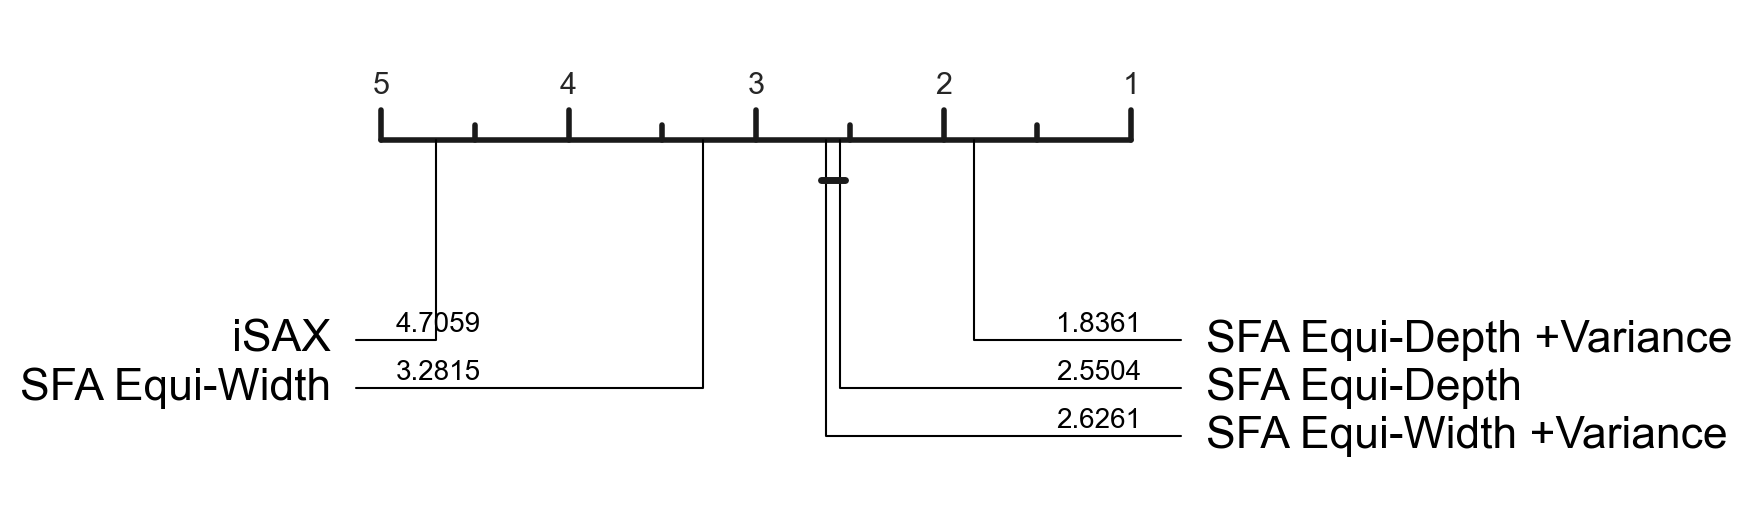

In [92]:
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
#plt.tight_layout()
plt.savefig("images/cd_diagramm.pdf", bbox_inches='tight')

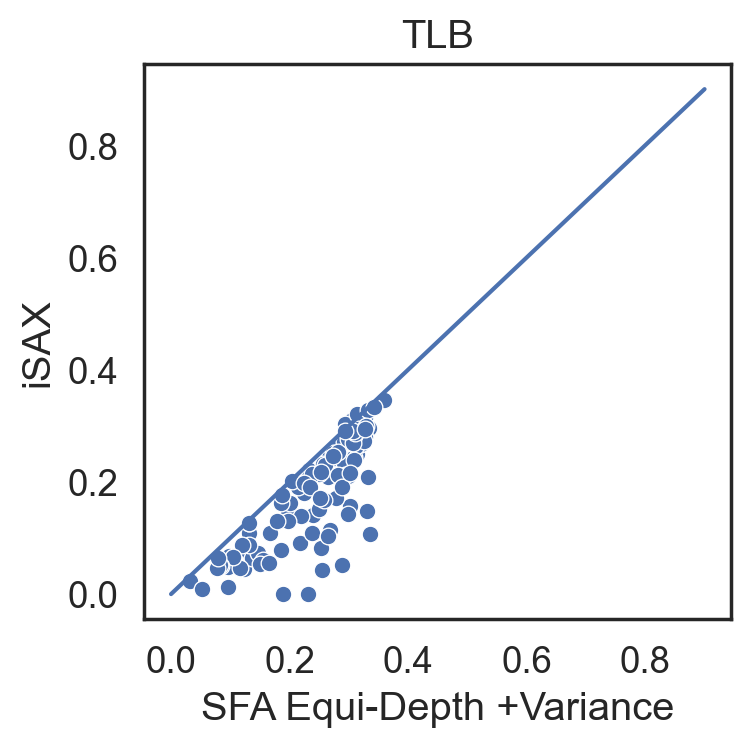

In [93]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ed_isax.pdf", bbox_inches='tight')

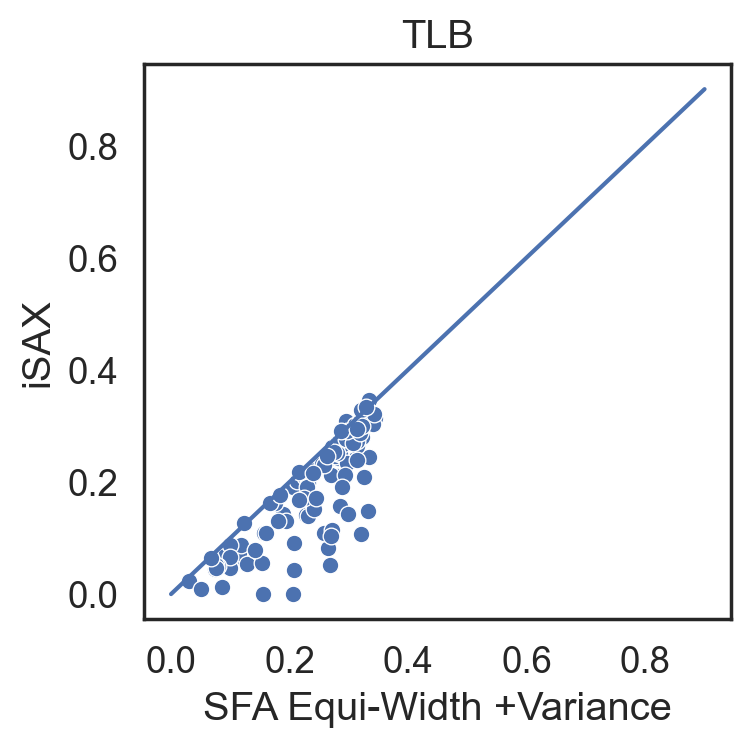

In [94]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_isax.pdf", bbox_inches='tight')

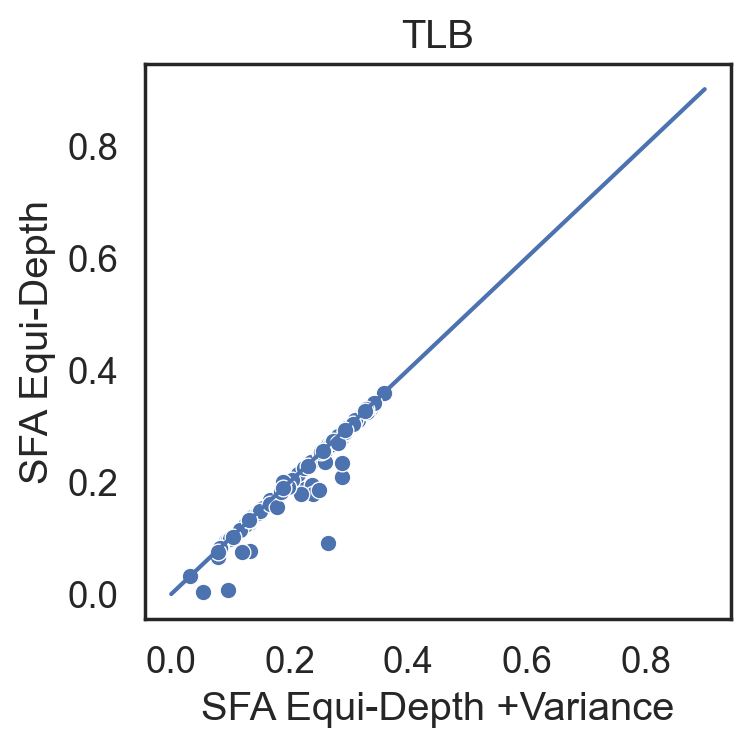

In [95]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth +Variance"
key2 = "SFA Equi-Depth"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ed_sfa_novar.pdf", bbox_inches='tight')

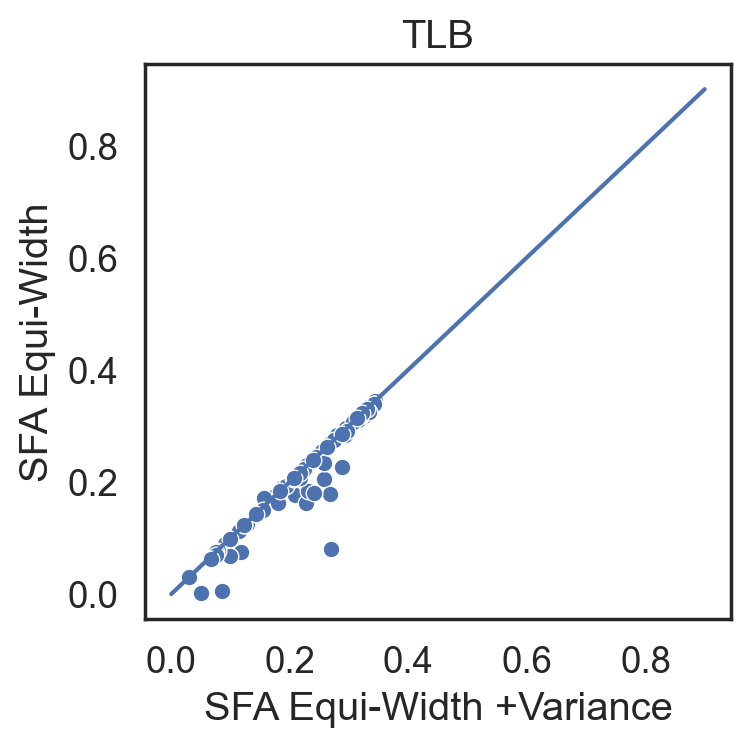

In [96]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_novar.pdf", bbox_inches='tight')

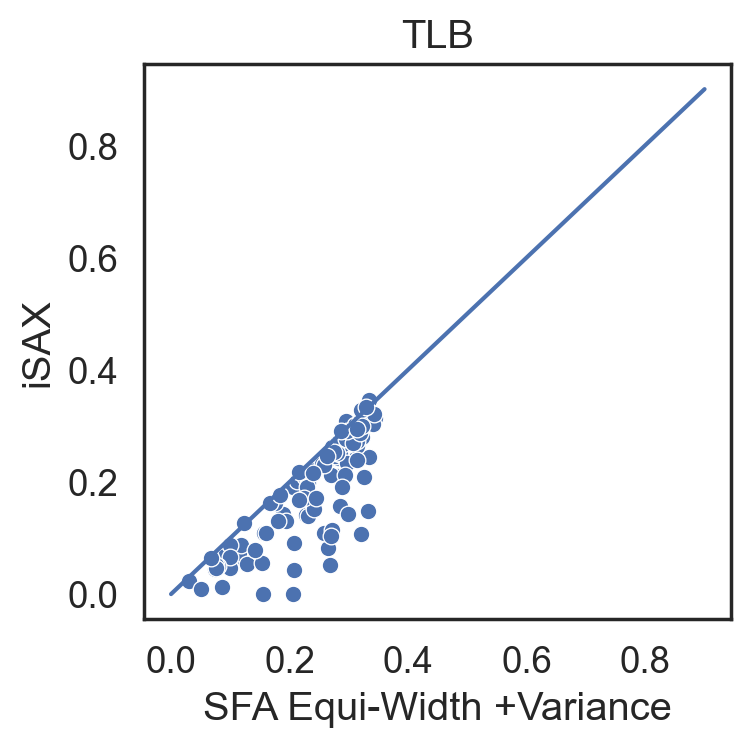

In [97]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_isax.pdf", bbox_inches='tight')

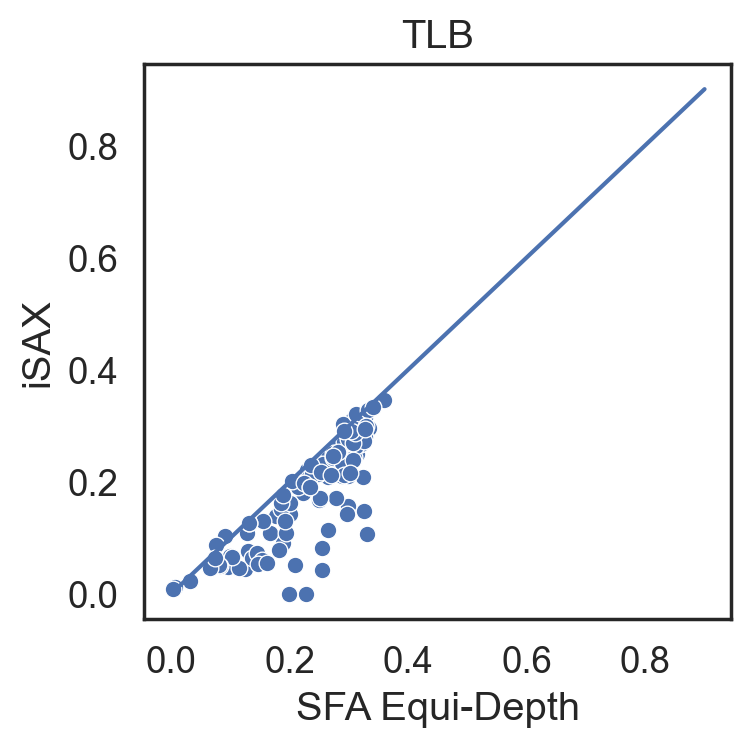

In [98]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Depth"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_ed_isax.pdf", bbox_inches='tight')

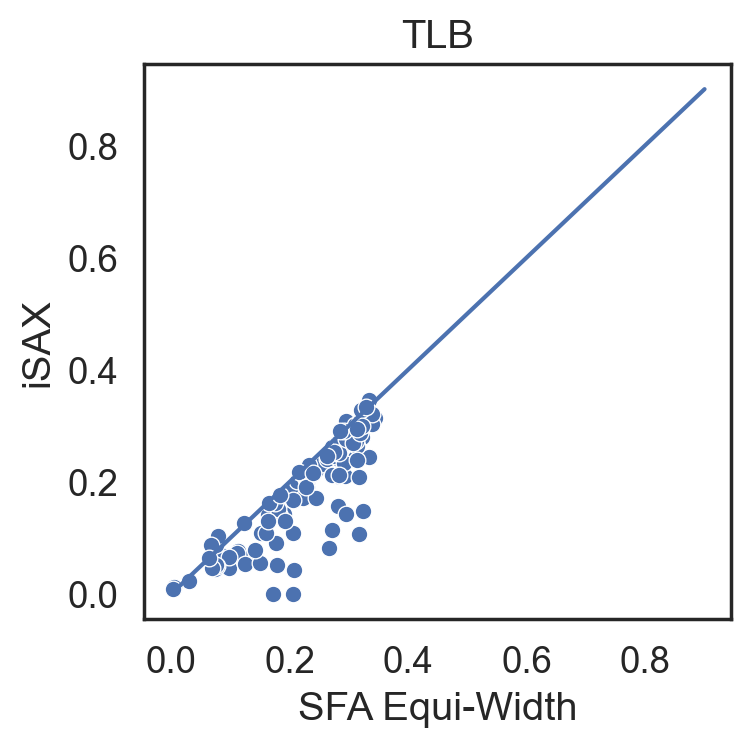

In [99]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y="iSAX", data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_ew_isax.pdf", bbox_inches='tight')

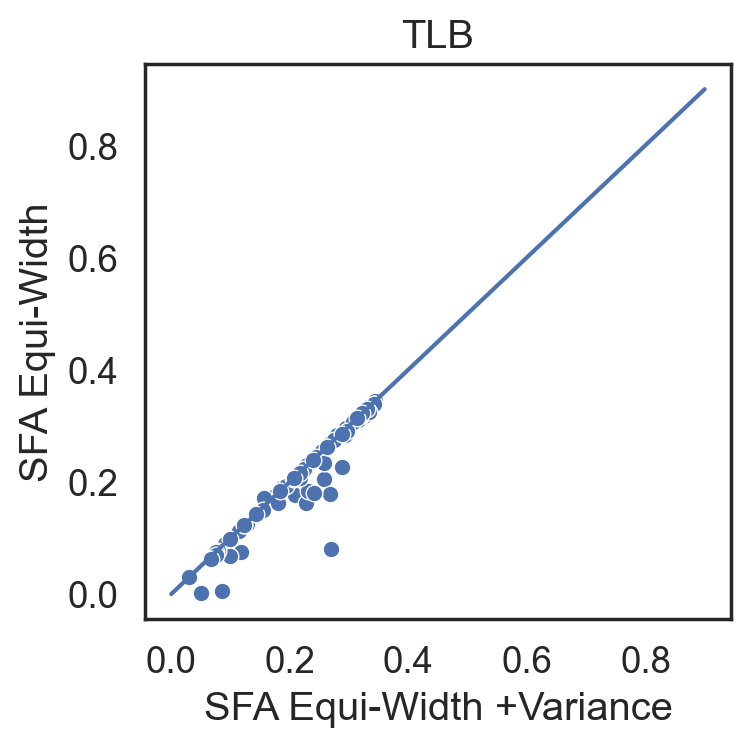

In [100]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Width"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_novar_ew.pdf", bbox_inches='tight')

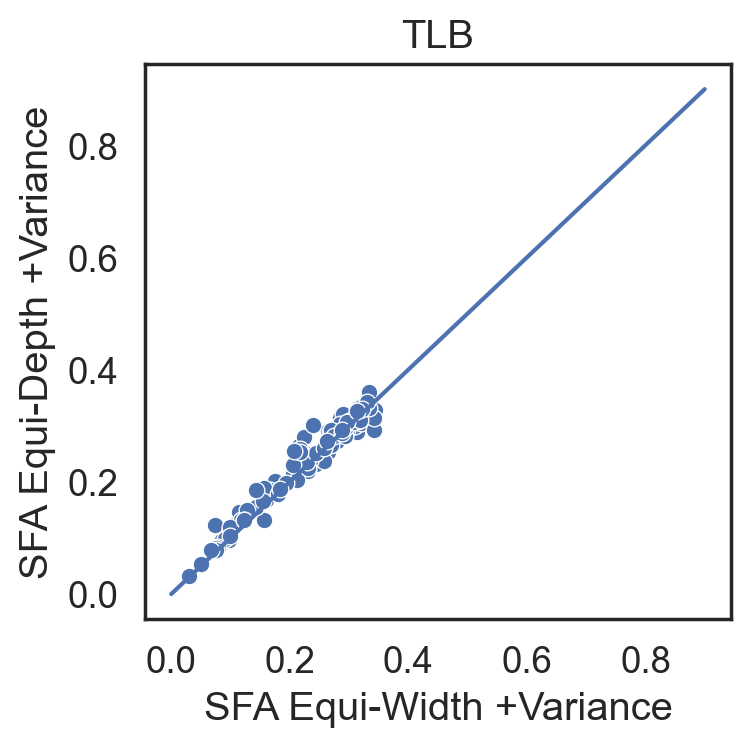

In [101]:
sns.set(font_scale=1.2)
sns.set_style("white")

key = "SFA Equi-Width +Variance"
key2 = "SFA Equi-Depth +Variance"
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=key, y=key2, data=df_pivot)
ax.plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
ax.set_title("TLB")
plt.tight_layout()
plt.savefig("images/tlb_pairwise_sfa_var_ew_sfa_var_ed.pdf", bbox_inches='tight')

In [121]:
df_subset = df[df.Method.isin(["SFA Equi-Width +Variance", "iSAX"]) & df.Dataset.isin(["SemgHandSubjectCh2", "SemgHandMovementCh2", "SemgHandGenderCh2", "RefrigerationDevices", "PigArtPressure", "Ham", "EthanolLevel", "Coffee"])]
df_pivot  = df_subset.pivot_table(index='Dataset', columns='Method', values='TLB', aggfunc='median')
df_pivot["diff"] = df_pivot["SFA Equi-Width +Variance"] / (df_pivot["iSAX"])
df_pivot.sort_values(by="diff", ascending=False)

# df_subset[["Method", "TLB"]].groupby("Method").median().sort_values(by="TLB", ascending=False)

Method,SFA Equi-Width +Variance,iSAX,diff
Dataset,,,
EthanolLevel,0.266346,0.050482,5.276001
Coffee,0.269579,0.071695,3.760093
PigArtPressure,0.270787,0.101825,2.659331
SemgHandMovementCh2,0.076751,0.049426,1.552850
SemgHandSubjectCh2,0.070825,0.047556,1.489307
SemgHandGenderCh2,0.098386,0.066325,1.483395
Ham,0.193013,0.133827,1.442260
RefrigerationDevices,0.100429,0.092428,1.086567
